# 5. Modelling <a id='5_modelling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>

* [5. Modelling](#5_modelling)
    * [5.1 Contents](#5.1_Contents)
    * [5.2 Introduction](#5.2_Introduction)
    * [5.3 Data Description](#5.3_data_description)
    * [5.4 Import](#5.4_import)
        * [5.4.1 Package Imports](#5.4.1_packages)
        * [5.4.2 Import Data](#5.4.2_data)
    * [5.5 Linear Regression](#5.5_linear_regression)
        * [5.5.1 Linear Regression with all variables](#5.5.1_lr_all)
        * [5.5.2 Linear Regression with significant variables](#5.5.2_lr_sig)
        * [5.5.3 Linear Regression with significant variables and regional indicators](#5.5.3_lr_sig2)
        * [5.5.4 Linear Regression with all variables and cross validation](#5.5.4_lr_cv)
        * [5.5.5 Linear Regression with significant variables and regional indicators and cross validation](#5.5.5_lr_cv)
        * [5.5.6 Linear Regression with significant variables and cross validation](#5.5.6_lr_cv)
        * [5.5.7 Lasso Linear Regression with all variables and GridSearchCV](#5.5.7_lrlasso_cv)
    * [5.6 Conclusions](#5.6_conclusions)    
    * [5.7 Resources Used](#5.7_resources)
    
    

## 5.2 Introduction  <a id='5.2_Introduction'></a>

**Goal: Build two to three different models and identify the best one.**
1. Fit your models with a training dataset
2. Review model outcomes — Iterate over additional models as needed
3. Identify the final model that you think is the best model for this project


## 5.3 Data Description  <a id='5.3_data_description'></a>

**Ladder score:** Happiness score or subjective well-being (variable name ladder): The survey measure of SWB is from the Feb 26, 2021 release of the Gallup World Poll (GWP) covering years from 2005 to 2020. Unless stated otherwise, it is the na- tional average response to the question of life evaluations. The English wording of the question is “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder, or just life ladder in our analysis.

**Logged GDP per capita:** The statistics of GDP per capita (variable name gdp) in purchasing power parity (PPP) at constant 2017 international dollar prices are from the October 14, 2020 update of the World Development Indicators (WDI). The GDP figures for Taiwan, Syria, Palestine, Venezuela, Djibouti and Ymen are from the Penn World Table 9.1.
   * – GDP per capita in 2020 are not yet available as of December 2020. We extend the GDP-per-capita time series from 2019 to 2020 using country- specific forecasts of real GDP growth in 2020 first from the OECD Eco- nomic Outlook No 108 (December 2020) and then, if missing, forecasts from World Bank’s Global Economic Prospects (Last Updated: 06/08/2020). The GDP growth forecasts are adjusted for population growth with the subtraction of 2018-19 population growth as the projected 2019-20 growth.

**Social support:** Socialsupport(orhavingsomeonetocountonintimesoftrouble)isthenational average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

**Healthy life expectancy:** Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-09-28). The data at the source are available for the years 2000, 2005, 2010, 2015 and 2016. To match this report’s sample period (2005-2020), interpolation and extrapolation are used.

**Freedom to make life choices:** Freedom to make life choices is the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

**Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

**Perceptions of corruption:** Corruption Perception: The measure is the national average of the survey re- sponses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” The overall perception is just the average of the two 0-or-1 responses. In case the perception of government corruption is missing, we use the perception of business corruption as the overall perception. The corruption perception at the national level is just the average response of the overall perception at the individual level.


**gini:** description:Gini shows income inequality in a society. A higher number means more inequality.
source_url:http://gapm.io/ddgini

**income_per_capita:** description:Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).
source:Gapminder based on World Bank, A. Maddison, M. Lindgren, IMF & more.
source_url:http://gapm.io/dgdppc

**fertility:** description:Total fertility rate. The number of children that would be born to each woman with prevailing age-specific fertility rates.
source_url:http://gapm.io/dtfr

**child_mortality:** description:Death of children under five years of age per 1,000 live births
source_url:http://gapm.io/du5mr

**labor_ppt_25-54:** description:For age group 25-54, percentage of all labour to total population.
source_url:https://www.ilo.org/ilostat/




## 5.4 Import <a id='5.4_import'></a>

### 5.4.1 Import packages <a id='5.4.1_packages'></a>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn


### 5.4.2 Import Data <a id='5.4.2_data'></a>

In [29]:
df = pd.read_csv('whr2021_final.csv')

In [30]:
df.head()

,Country name,Ladder score,norm_Logged GDP per capita,norm_Social support,norm_Healthy life expectancy,norm_Freedom to make life choices,norm_Generosity,norm_Perceptions of corruption,norm_gini,norm_income_per_capita,norm_fertility,norm_child_mortality,norm_labor_ppt_25-54,Asia,Central and Eastern Europe,Commonwealth of Independent States,Latin America and Caribbean,Middle East and North Africa,Sub-Saharan Africa
0,Finland,7.842,1.226944,1.502062,1.128520,1.660708,-0.465277,-1.994367,-1.745908,1.187030,-0.585790,-1.818155,0.485035,0,0,0,0,0,0
1,Denmark,7.620,1.394624,1.502062,1.271619,1.619109,0.491002,-1.999730,-1.505408,1.334289,-0.604059,-1.087653,0.631112,0,0,0,0,0,0
2,Switzerland,7.571,1.594036,1.320956,1.633058,1.258141,0.458837,-1.886295,-0.721361,1.546273,-1.054440,-1.096598,1.223485,0,0,0,0,0,0
3,Iceland,7.554,1.335883,1.970362,1.333961,1.744819,1.210970,-0.678778,-1.591190,1.294106,-0.412187,-1.677188,1.223485,0,0,0,0,0,0
4,Netherlands,7.464,1.393552,1.320956,1.209887,1.181130,1.281711,-1.820015,-1.505408,1.386909,-0.641122,-1.188360,0.721541,0,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country name                        140 non-null    object 
 1   Ladder score                        140 non-null    float64
 2   norm_Logged GDP per capita          140 non-null    float64
 3   norm_Social support                 140 non-null    float64
 4   norm_Healthy life expectancy        140 non-null    float64
 5   norm_Freedom to make life choices   140 non-null    float64
 6   norm_Generosity                     140 non-null    float64
 7   norm_Perceptions of corruption      140 non-null    float64
 8   norm_gini                           140 non-null    float64
 9   norm_income_per_capita              140 non-null    float64
 10  norm_fertility                      140 non-null    float64
 11  norm_child_mortality                140 non-n

In [32]:
X = df.drop(['Ladder score', 'Country name'], axis=1)
y = df['Ladder score']

In [33]:
# Split data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 97)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 17), (35, 17), (105,), (35,))

## 5.5 Linear Regression <a id='5.5_linear_regression'></a>

### 5.5.1 Linear Regression with all variables <a id='5.5.1_lr_all'></a>

Lets start by fitting all data points into a Linear Regression model to start.

In [34]:
rModel = linear_model.LinearRegression()
train_model = rModel.fit(X_train, y_train)
train_model.score(X_train, y_train)

0.8420370499983484

R_squared is 0.844 for this model.

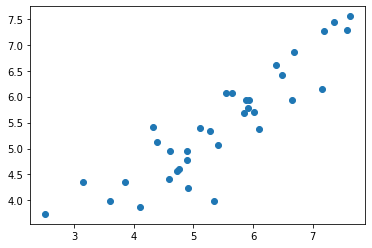

In [35]:
# Use the model to make predictions about our test data and plot results
y_predict_lr = train_model.predict(X_test)

plt.scatter(y_test, y_predict_lr)

In [52]:
# Print results of the prediction

print('Mean Absolute Error: ', mean_absolute_error(y_test,y_predict_lr ))
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_lr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict_lr)))

Mean Absolute Error:  0.4042177048915764
Mean Squared Error:  0.30464184688332613
Root Mean Squared Error:  0.5519436990158744


In [94]:
lr1_all_metrics = [mean_absolute_error(y_test,y_predict_lr ), mean_squared_error(y_test, y_predict_lr), np.sqrt(mean_squared_error(y_test, y_predict_lr))]

In [100]:
df_metrics = pd.DataFrame(lr1_all_metrics).T
df_metrics['index'] = 'linear regression all vars'

df_metrics.set_index('index', inplace=True)
df_metrics.columns = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
df_metrics

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
linear regression all vars,0.404218,0.304642,0.551944


In [36]:
train_model.coef_

array([ 1.24728231,  0.22081092,  0.1019702 ,  0.2087213 ,  0.07410764,
       -0.05118137, -0.17197221, -0.85281853,  0.15076864, -0.09785776,
       -0.05937429, -0.45801104, -0.24527735, -0.5463111 ,  0.27509028,
       -0.66453753, -0.28264711])

In [37]:
coefficients = pd.DataFrame(train_model.coef_.T, index=X.columns, columns=['coefficients'])
coefficients

,coefficients
norm_Logged GDP per capita,1.247282
norm_Social support,0.220811
norm_Healthy life expectancy,0.101970
norm_Freedom to make life choices,0.208721
norm_Generosity,0.074108
norm_Perceptions of corruption,-0.051181
norm_gini,-0.171972
norm_income_per_capita,-0.852819
norm_fertility,0.150769
norm_child_mortality,-0.097858


In [38]:
train_model.intercept_

5.773520652202267

Look at the cofficients for the Regional Indicator Dummy variables (Asia, Central and Eastern Europe etc...) they are all negaive which means relaive to Western Developed Countries, all other categories result in a drop in ladder score.

In [44]:
# Use OLS to get p-values

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
y_train_sm = y_train.values.reshape(-1,1)
y_test_sm = y_test.values.reshape(-1,1)

X_train_sm.shape, X_test_sm.shape, y_train_sm.shape, y_test_sm.shape

((105, 18), (35, 18), (105, 1), (35, 1))

In [46]:
ols_model = sm.OLS(y_train_sm, X_train_sm)
ols_results = ols_model.fit()
ols_results.params

const                                 5.773521
norm_Logged GDP per capita            1.247282
norm_Social support                   0.220811
norm_Healthy life expectancy          0.101970
norm_Freedom to make life choices     0.208721
norm_Generosity                       0.074108
norm_Perceptions of corruption       -0.051181
norm_gini                            -0.171972
norm_income_per_capita               -0.852819
norm_fertility                        0.150769
norm_child_mortality                 -0.097858
norm_labor_ppt_25-54                 -0.059374
Asia                                 -0.458011
Central and Eastern Europe           -0.245277
Commonwealth of Independent States   -0.546311
Latin America and Caribbean           0.275090
Middle East and North Africa         -0.664538
Sub-Saharan Africa                   -0.282647
dtype: float64

In [47]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     27.28
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           1.08e-27
Time:                        11:14:23   Log-Likelihood:                -56.052
No. Observations:                 105   AIC:                             148.1
Df Residuals:                      87   BIC:                             195.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  5.7735      0.192     30.147      0.000       5.393       6.154
norm_Logged GDP per capita             1.2473      0.522      2.387      0.019       0.209       2.286
norm_Social support                    0.2208      0.094      2.344      0.021       0.034       0.408
norm_Healthy life expectancy           0.1020      0.188      0.543      0.589      -0.271       0.475
norm_Freedom to make life choices      0.2087      0.066      3.154      0.002       0.077       0.340
norm_Generosity                        0.0741      0.053      1.389      0.168      -0.032       0.180
norm_Perceptions of corruption        -0.0512      0.063     -0.808      0.421      -0.177       0.075
norm_gini                             -0.1720      0.067     -2.553      0.012      -0.306      -0.038
norm_income_per_capita                -0.8528      0.481     -1.774      0.080      -1.809       0.103
norm_fertility                         0.1508      0.107      1.411      0.162      -0.062       0.363
norm_child_mortality                  -0.0979      0.185     -0.528      0.599      -0.466       0.271
norm_labor_ppt_25-54                  -0.0594      0.059     -1.015      0.313      -0.176       0.057
Asia                                  -0.4580      0.259     -1.767      0.081      -0.973       0.057
Central and Eastern Europe            -0.2453      0.239     -1.027      0.307      -0.720       0.229
Commonwealth of Independent States    -0.5463      0.273     -2.001      0.049      -1.089      -0.004
Latin America and Caribbean            0.2751      0.255      1.078      0.284      -0.232       0.782
Middle East and North Africa          -0.6645      0.282     -2.355      0.021      -1.225      -0.104
Sub-Saharan Africa                    -0.2826      0.330     -0.855      0.395      -0.939       0.374
==============================================================================
Omnibus:                       11.596   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.954
Skew:                          -0.769   Prob(JB):                      0.00254
Kurtosis:                       3.605   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on p-values, we see that at a 95% confidence interval, the following variables are statistically significant:

1. norm_Logged GDP per capita
2. norm_Social Support
3. norm_Freedom to make life choices
4. norm_income_per_capita
5. norm_gini

### 5.5.2 Linear Regression with significant variables <a id='5.5.2_lr_sig'></a>

In [84]:
# create list of significant variables

significant_vars = ['norm_Logged GDP per capita', 'norm_Social support', 'norm_Freedom to make life choices', 'norm_income_per_capita', 'norm_gini']

In [89]:
# Filter X dataset for only significant variables

X_train_sig = X_train.loc[:, significant_vars]
X_test_sig = X_test.loc[:, significant_vars]

X_train_sig.shape, X_test_sig.shape

((105, 5), (35, 5))

In [90]:
# Train model with only significant variables

rModel_sig = linear_model.LinearRegression()
train_model_sig = rModel.fit(X_train_sig, y_train)
train_model_sig.score(X_train_sig, y_train)
y_predict_sig = train_model.predict(X_test_sig)

In [91]:
# Print results of the prediction

print('Mean Absolute Error: ', mean_absolute_error(y_test,y_predict_sig ))
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_sig))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict_sig)))

Mean Absolute Error:  0.44527597584273865
Mean Squared Error:  0.3486660606752898
Root Mean Squared Error:  0.5904795175747334


In [93]:
lr2_sig_metrics = [mean_absolute_error(y_test,y_predict_sig ), mean_squared_error(y_test, y_predict_sig), np.sqrt(mean_squared_error(y_test, y_predict_sig))]

In [95]:
df_metrics_sig = pd.DataFrame(lr2_sig_metrics).T
df_metrics_sig['index'] = 'linear regression with five features'

df_metrics_sig.set_index('index', inplace=True)
df_metrics_sig.columns = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
df_metrics_sig

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
linear regression with five features,0.445276,0.348666,0.59048


In [101]:
df_metrics = pd.concat([df_metrics, df_metrics_sig])
df_metrics

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
linear regression all vars,0.404218,0.304642,0.551944
linear regression with five features,0.445276,0.348666,0.590480


The model underperformed when we only used significant variables. Next, let's try to include the regional indicator variables

### 5.5.3 Linear Regression with significant variables and regional indicators <a id='5.5.3_lr_sig2'></a>

In [109]:
significant_vars2 = ['norm_Logged GDP per capita', 'norm_Social support', 'norm_Freedom to make life choices', 'norm_income_per_capita', 'norm_gini', 'Asia','Central and Eastern Europe','Commonwealth of Independent States', 'Latin America and Caribbean','Middle East and North Africa','Sub-Saharan Africa']

In [110]:
# Filter X dataset for only significant variables

X_train_sig2 = X_train.loc[:, significant_vars2]
X_test_sig2 = X_test.loc[:, significant_vars2]

X_train_sig2.shape, X_test_sig2.shape

((105, 11), (35, 11))

In [111]:
# Train model with only significant variables

rModel_sig2 = linear_model.LinearRegression()
train_model_sig2 = rModel.fit(X_train_sig2, y_train)
train_model_sig2.score(X_train_sig2, y_train)
y_predict_sig2 = train_model.predict(X_test_sig2)

In [112]:
# Print results of the prediction

print('Mean Absolute Error: ', mean_absolute_error(y_test,y_predict_sig2 ))
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_sig2))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict_sig2)))

Mean Absolute Error:  0.40376747457433854
Mean Squared Error:  0.3233068958774723
Root Mean Squared Error:  0.5686008229658768


In [114]:
lr3_sig2_metrics = [mean_absolute_error(y_test,y_predict_sig2 ), mean_squared_error(y_test, y_predict_sig2), np.sqrt(mean_squared_error(y_test, y_predict_sig2))]

In [116]:
df_metrics_sig2 = pd.DataFrame(lr3_sig2_metrics).T
df_metrics_sig2['index'] = 'linear regression with five features and regional indicators'

df_metrics_sig2.set_index('index', inplace=True)
df_metrics_sig2.columns = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
df_metrics_sig2

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
linear regression with five features and regional indicators,0.403767,0.323307,0.568601


In [117]:
df_metrics = pd.concat([df_metrics, df_metrics_sig2])
df_metrics

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
linear regression all vars,0.404218,0.304642,0.551944
linear regression with five features,0.445276,0.348666,0.590480
linear regression with five features and regional indicators,0.403767,0.323307,0.568601


The model with all variables appears to have performed the best on test data with a MSE of 0.30 and RMSE of 0.55

### 5.5.4 Linear Regression with all variables and cross validation <a id='5.5.4_lr_cv'></a>

In [135]:
reg = linear_model.LinearRegression()
cv_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [136]:
print('Average 5 fold Mean Square Error is: ',np.mean(cv_scores * -1))

Average 5 fold Mean Square Error is:  0.29221992487558446


### 5.5.5 Linear Regression with 5 significant variables and regional indicators and cross validation <a id='5.5.5_lr_cv'></a>

In [142]:
reg = linear_model.LinearRegression()
cv_scores_sig2 = cross_val_score(reg, X_train_sig2, y_train, cv=5, scoring='neg_mean_squared_error')


In [143]:
print('Average 5 fold Mean Square Error is: ',np.mean(cv_scores_sig2 * -1))

Average 5 fold Mean Square Error is:  0.2708115503907027


### 5.5.6 Linear Regression with 5 significant variables and cross validation <a id='5.5.6_lr_cv'></a>

In [145]:
reg = linear_model.LinearRegression()
cv_scores_sig = cross_val_score(reg, X_train_sig, y_train, cv=5, scoring='neg_mean_squared_error')

In [146]:
print('Average 5 fold Mean Square Error is: ',np.mean(cv_scores_sig * -1))

Average 5 fold Mean Square Error is:  0.3129186314111664


When we use cross validation, the model with the 5 significant variables and regional indicators had the lowest mean square error.

### 5.5.7 Lasso Linear Regression with significant variables and GridSearchCV <a id='5.5.7_lrlasso_cv'></a>

In [162]:
lasso = linear_model.Lasso(max_iter = 20000)
params = {'alpha':(np.logspace(-8,8,50))}

In [163]:
lasso_model = GridSearchCV(lasso, params, cv=5)
lasso_model.fit(X_train_sig2, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=20000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-08, 2.12095089e-08, 4.49843267e-08, 9.54095476e-08,
       2.02358965e-07...
       2.81176870e+02, 5.96362332e+02, 1.26485522e+03, 2.68269580e+03,
       5.68986603e+03, 1.20679264e+04, 2.55954792e+04, 5.42867544e+04,
       1.15139540e+05, 2.44205309e+05, 5.17947468e+05, 1.09854114e+06,
       2.32995181e+06, 4.94171336e+06, 1.04811313e+07, 2.22299648e+07,
       4.71486636e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [172]:
lasso_model.best_params_, lasso_model.best_score_

({'alpha': 0.0075431200633546075}, 0.7440994018217512)

In [166]:
y_predict_lasso = lasso_model.predict(X_test_sig2)

In [167]:
# Print results of the prediction

print('Mean Absolute Error: ', mean_absolute_error(y_test,y_predict_lasso ))
print('Mean Squared Error: ', mean_squared_error(y_test, y_predict_lasso))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predict_lasso)))

Mean Absolute Error:  0.39206358848940287
Mean Squared Error:  0.2814140435200973
Root Mean Squared Error:  0.530484725058222


In [168]:
lr4_lasso_metrics = [mean_absolute_error(y_test,y_predict_lasso ), mean_squared_error(y_test, y_predict_lasso), np.sqrt(mean_squared_error(y_test, y_predict_lasso))]

In [170]:
df_metrics_lasso = pd.DataFrame(lr4_lasso_metrics).T
df_metrics_lasso['index'] = 'lasso regression with five features and regional indicators'

df_metrics_lasso.set_index('index', inplace=True)
df_metrics_lasso.columns = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
df_metrics_lasso

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
lasso regression with five features and regional indicators,0.392064,0.281414,0.530485


In [171]:
df_metrics = pd.concat([df_metrics, df_metrics_lasso])
df_metrics

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
index,,,
linear regression all vars,0.404218,0.304642,0.551944
linear regression with five features,0.445276,0.348666,0.590480
linear regression with five features and regional indicators,0.403767,0.323307,0.568601
lasso regression with five features and regional indicators,0.392064,0.281414,0.530485


## 5.6 Conclusions <a id='5.6_conclusions'></a>

We ran a regular linear regression model with all variables, one with only the 5 significant variables, and one with the 5 significant variables as wellas the regional indicator columns.

Of these three models, the one that had the lowest MSE and RMSE was the model with all variables despite having some features that were not statistically significant. From a prediction standpoint we would go with the model with all values however when drawing inference I would only focus on the 5 significant variables.

Afterwards, we used a lasso regression and Grid search to find the best alpha value. For a Lasso regression model using the 5 significant variables plus indicator variables, the best alpha was 0.0075, a very small value making this model very similar to Ordinary least squares regression. However Lasso did yield better predictions on the test set than when using any of the Linear Regression models. The Mean Aboslute error, Mean Squared Error and RMSE were all lower than any linear regression model.

For the time being the Lasso regression model is the best one for predicting the happiness score for a country.

## 5.7 Resources Used <a id='5.7_resources'></a>

https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge
